# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
from tqdm import tqdm
import os

In [2]:
# set figure details
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
# rc("svg", font="none")
rc("svg", fonttype="none")

# CAG counts

In [3]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [4]:
from collections import defaultdict

In [5]:
genefamily_to_taxa = defaultdict(list)

chunksize = 100000
number_of_rows = 2 * 3688215
iterator = pd.read_csv(os.path.join(config.RAW_DIR, "humann_genefamilies.tsv"), sep="\t", index_col=0, chunksize=chunksize, usecols=[0, 1])
i = 0

for chunk in iterator:
    print((i * chunksize) / number_of_rows)
    i += 1
    for ind in chunk.index:
        if "|" not in ind: continue
        family, taxa = ind.split("|")
        genefamily_to_taxa[family].append(taxa)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/humann_genefamilies.tsv'

In [11]:
CAG_to_gene = {}

for cag in clusters.index.unique():
    CAG_to_gene[cag] = clusters.loc[cag].values.flatten()

In [12]:
CAG_to_taxa = {}

for curr_CAG in tqdm(clusters.index.unique()):
    genes = CAG_to_gene[curr_CAG] 
    num_genes = len(genes)
    
    total_taxa = []
    for g in genes:
        taxa_list = genefamily_to_taxa[g]
        for t in taxa_list:
            total_taxa.append(t)
            
    unique_taxa, counts = np.unique(total_taxa, return_counts=True)
    name = f"{curr_CAG} count"
    df = pd.DataFrame(counts, index=unique_taxa, columns=[name])
    df["Proportion of genes in CAG"] = counts / num_genes
    df = df.sort_values(name, ascending=False)
    CAG_to_taxa[curr_CAG] = df

100%|███████████████████████████████████████████████████████| 27818/27818 [00:19<00:00, 1408.54it/s]


In [13]:
clusters.loc["CAG00001"].shape

(11642, 1)

In [14]:
all_taxa = []

for key in genefamily_to_taxa:
    for t in genefamily_to_taxa[key]:
        all_taxa.append(t)

In [15]:
unique, counts = np.unique(all_taxa, return_counts=True)
counts

array([   1468,    1567,    1835,    1500,    2367,    2221,   16619,
          3817,     944,    4390,    3662,    4459,    1961,    3527,
          2110,    5344,      22,      94,    1572,    2224,     169,
          1832,    3793,    2087,    1998,    1902,    1966,    1991,
          1443,    1943,    1708,    1619,    3146,     201,    1464,
          1604,    5358,     179,    3353,    3552,    3117,    2159,
          8607,    2938,    2195,    1655,    2561,    2707,    3199,
          2474,    2558,    1097,    1336,    1489,     997,     382,
           141,    1378,    1009,    1626,    1255,    3086,    3995,
          3694,    7082,    3562,    6964,    1690,    3257,    4080,
          1533,    1551,     600,     173,    1733,    1726,   11017,
          8025,    3150,   13491,    4323,    3722,    2954,   10624,
          4551,    5751,    6381,    3367,   30574,    2553,    3374,
          8691,    3690,    4180,   16892,    6234,    1744,    3079,
          5050,    3

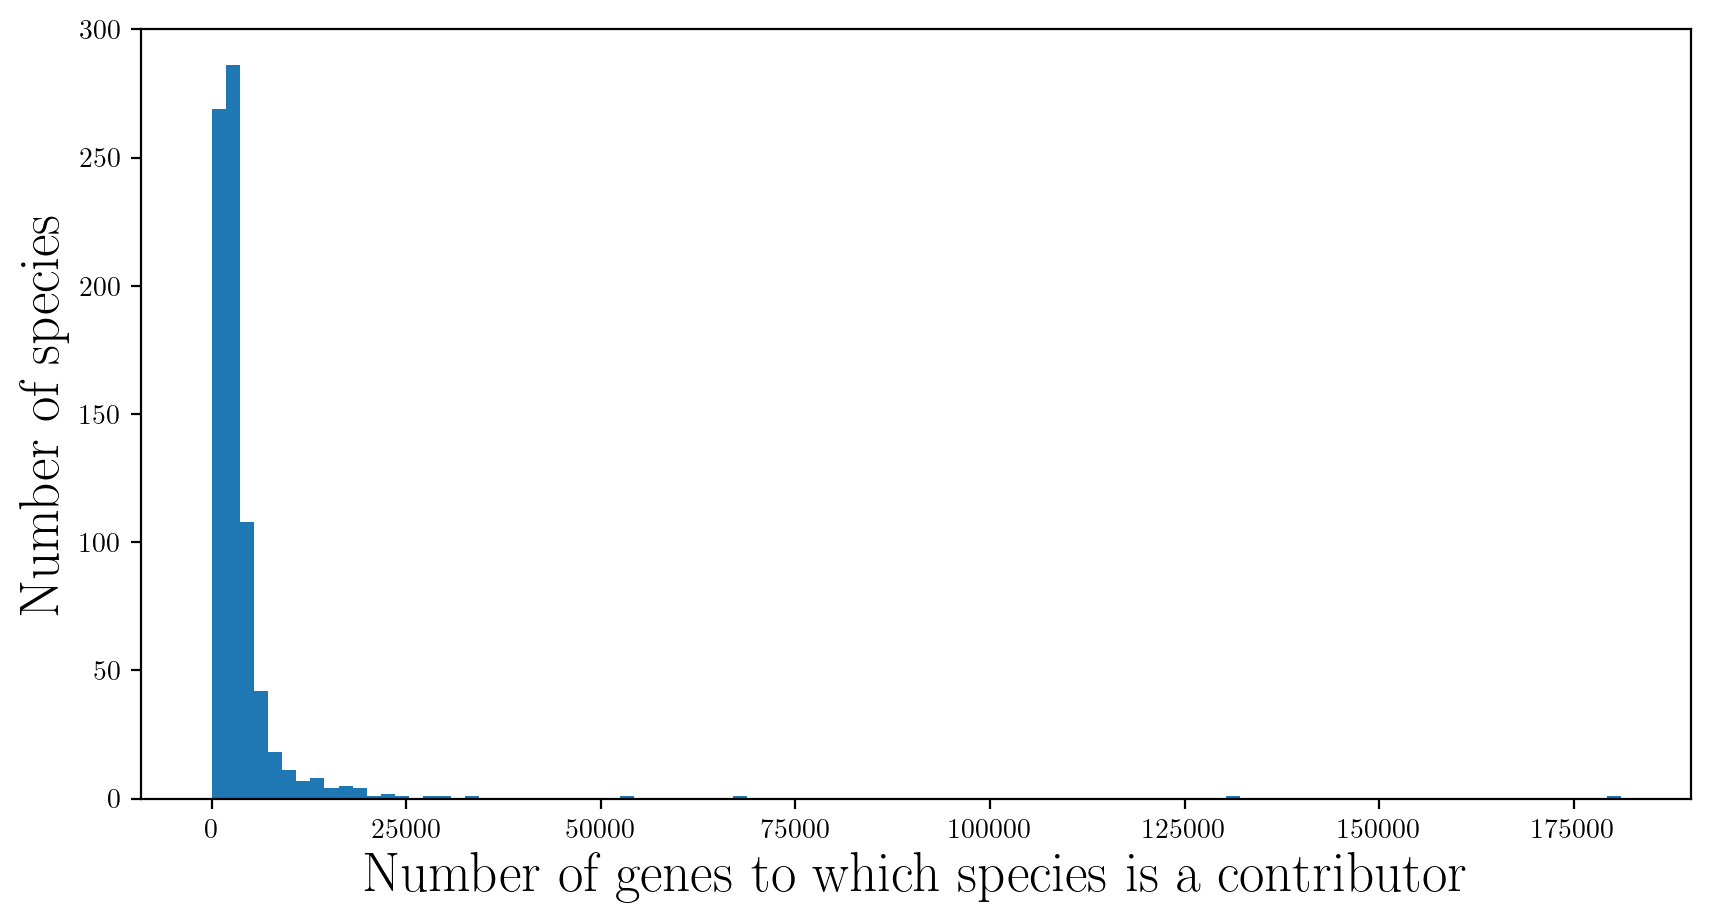

In [16]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(counts[:-1], bins=100)
plt.ylabel("Number of species", fontsize=20)
plt.xlabel("Number of genes to which species is a contributor", fontsize=20)

plt.show()

In [17]:
len(set(all_taxa))

774

In [18]:
set(all_taxa)

{'g__Abiotrophia.s__Abiotrophia_defectiva',
 'g__Abiotrophia.s__Abiotrophia_sp_HMSC24B09',
 'g__Absiella.s__Absiella_dolichum',
 'g__Acetobacter.s__Acetobacter_sp_CAG_267',
 'g__Acidaminococcus.s__Acidaminococcus_intestini',
 'g__Acidipropionibacterium.s__Acidipropionibacterium_acidipropionici',
 'g__Acinetobacter.s__Acinetobacter_baumannii',
 'g__Acinetobacter.s__Acinetobacter_bereziniae',
 'g__Acinetobacter.s__Acinetobacter_guillouiae',
 'g__Acinetobacter.s__Acinetobacter_johnsonii',
 'g__Acinetobacter.s__Acinetobacter_junii',
 'g__Acinetobacter.s__Acinetobacter_nosocomialis',
 'g__Acinetobacter.s__Acinetobacter_pittii',
 'g__Acinetobacter.s__Acinetobacter_radioresistens',
 'g__Acinetobacter.s__Acinetobacter_soli',
 'g__Acinetobacter.s__Acinetobacter_ursingii',
 'g__Actinobaculum.s__Actinobaculum_massiliense',
 'g__Actinobaculum.s__Actinobaculum_sp_oral_taxon_183',
 'g__Actinomyces.s__Actinomyces_europaeus',
 'g__Actinomyces.s__Actinomyces_graevenitzii',
 'g__Actinomyces.s__Actinomyc

In [19]:
import pickle

with open(os.path.join("../output/logs", "association_dict_prop.pkl"), "rb") as f:
    ass = pickle.load(f)
ass

[{'host': 'CAG00001',
  'dependent': 'CAG00233',
  'p': 0.0,
  'prop': 0.003401360544217687},
 {'host': 'CAG00001',
  'dependent': 'CAG00644',
  'p': 7.616686021405449e-106,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00773',
  'p': 1.1954910828323342e-56,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00960',
  'p': 1.6567784e-316,
  'prop': 0.008130081300813009},
 {'host': 'CAG00001',
  'dependent': 'CAG01116',
  'p': 2.1894812256023566e-112,
  'prop': 0.009900990099009901},
 {'host': 'CAG00001',
  'dependent': 'CAG02369',
  'p': 2.097715408495713e-188,
  'prop': 0.00625},
 {'host': 'CAG00001',
  'dependent': 'CAG12837',
  'p': 2.424443215344743e-256,
  'prop': 0.004830917874396135},
 {'host': 'CAG00002',
  'dependent': 'CAG00198',
  'p': 3.9866986251065166e-172,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00349',
  'p': 3.1964515382948876e-123,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00746',
  'p': 4.1046936218592227e-81,
  'prop'

In [20]:
p_cutoff = 0

ass_dict_retained = [a for a in ass if a["p"] * (counts.shape[0] ** 2) <= p_cutoff]

len(ass_dict_retained)

2691

In [21]:
nodes = {a["host"] for a in ass_dict_retained} | {a["dependent"] for a in ass_dict_retained}
len(nodes)

1239

In [22]:
counts = clusters.groupby(level=0).count()
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [23]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [24]:
phage_genes_in_CAGs = set(phage.iloc[:, 0]) & set(clusters.iloc[:, 0])

In [25]:
is_phage_gene = clusters.iloc[:, 0].apply(lambda x : x in phage_genes_in_CAGs)

In [26]:
clusters["is_phage_gene"] = is_phage_gene

In [27]:
phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_80489/2207627127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]


In [28]:
phage_gene_distribution

,is_phage_gene
0,
CAG00001,2
CAG00002,5
CAG00003,5
CAG00004,3
CAG00005,11
...,...
CAG27814,0
CAG27815,0
CAG27816,0


In [29]:
phage_gene_proportions = np.divide(phage_gene_distribution, counts)

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_80489/3229526074.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  phage_gene_proportions = np.divide(phage_gene_distribution, counts)


In [30]:
phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0].sort_values("is_phage_gene", ascending=False)

,is_phage_gene
0,
CAG23659,1.000000
CAG24842,1.000000
CAG23718,1.000000
CAG23879,1.000000
CAG24075,1.000000
...,...
CAG00023,0.000420
CAG00020,0.000415
CAG00014,0.000384


In [31]:
potential_phages = phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0.25].sort_values("is_phage_gene", ascending=False).index
potential_phages

Index(['CAG19342', 'CAG12742', 'CAG24842', 'CAG24873', 'CAG22541', 'CAG13058',
       'CAG26604', 'CAG24904', 'CAG17683', 'CAG24075',
       ...
       'CAG00831', 'CAG02169', 'CAG01377', 'CAG03857', 'CAG03689', 'CAG03661',
       'CAG01038', 'CAG00530', 'CAG01315', 'CAG01460'],
      dtype='object', name=0, length=690)

In [32]:
from collections import defaultdict

adjacency_list = defaultdict(list)

for a in ass_dict_retained:
    adjacency_list[a["host"]].append(a["dependent"])

adjacency_list

defaultdict(list,
            {'CAG00001': ['CAG00233'],
             'CAG00003': ['CAG00283',
              'CAG00356',
              'CAG00415',
              'CAG00494',
              'CAG02387'],
             'CAG00005': ['CAG00569'],
             'CAG00009': ['CAG00171',
              'CAG00378',
              'CAG00397',
              'CAG00406',
              'CAG00407',
              'CAG00566'],
             'CAG00010': ['CAG00515',
              'CAG00872',
              'CAG01248',
              'CAG01456',
              'CAG01992',
              'CAG02499',
              'CAG02863',
              'CAG04028',
              'CAG05836',
              'CAG06927',
              'CAG07148',
              'CAG08913',
              'CAG09304',
              'CAG12753',
              'CAG13191',
              'CAG13442',
              'CAG13619',
              'CAG15547',
              'CAG15739',
              'CAG15960',
              'CAG16687'],
             'CAG00011': ['CAG003

In [33]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
CAG

,1,2,3,4,5,6,7,8,9,10,...,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000010,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000071,0.000000,0.000024,0.000041,0.000015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG27815,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.0,0.0
CAG27816,0.000000,0.000000,0.000000e+00,0.000146,0.000089,0.000000e+00,0.0,0.000238,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [34]:
all_cags = counts.index
has_CAG = {c : (CAG.loc[c] > 0).values.flatten() for c in all_cags}
has_CAG

{'CAG00001': array([False, False, False, ..., False, False, False]),
 'CAG00002': array([False, False, False, ..., False, False, False]),
 'CAG00003': array([False, False, False, ..., False, False, False]),
 'CAG00004': array([False, False, False, ..., False, False, False]),
 'CAG00005': array([False, False, False, ...,  True, False, False]),
 'CAG00006': array([False, False, False, ..., False, False, False]),
 'CAG00007': array([False, False, False, ...,  True, False, False]),
 'CAG00008': array([False, False, False, ...,  True, False, False]),
 'CAG00009': array([False, False, False, ..., False, False, False]),
 'CAG00010': array([False, False, False, ...,  True,  True,  True]),
 'CAG00011': array([False, False, False, ...,  True, False, False]),
 'CAG00012': array([False, False, False, ..., False, False, False]),
 'CAG00013': array([False, False, False, ..., False, False, False]),
 'CAG00014': array([False, False, False, ..., False,  True, False]),
 'CAG00015': array([False, False, 

In [35]:
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

antagonistic = []

for host in tqdm(adjacency_list):
    dependent = adjacency_list[host]
    if len(dependent) < 2 : continue
    for d1 in dependent:
        for d2 in dependent:
            if d1 == d2: continue
            has_CAG1 = has_CAG[d1]
            has_CAG2 = has_CAG[d2]
            has_either = has_CAG1 | has_CAG2
            coef = matthews_corrcoef(has_CAG1[has_either], has_CAG2[has_either])
#             if coef < 0:
#                 antagonistic.append({"d1" : d1, "d2" : d2, "coef" : coef, "host" : host})
            antagonistic.append({"d1" : d1, "d2" : d2, "coef" : coef, "host" : host})

100%|█████████████████████████████████████████████████████████████| 541/541 [00:54<00:00,  9.89it/s]


In [36]:
sorted_ant = sorted(antagonistic, key=lambda x : x["coef"])
sorted_ant

[{'d1': 'CAG00200',
  'd2': 'CAG05540',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG05540',
  'd2': 'CAG00200',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG00189',
  'd2': 'CAG00361',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00189',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00082',
  'd2': 'CAG00361',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00082',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG01316',
  'd2': 'CAG02863',
  'coef': -0.7092799

In [37]:
strong_ant = [a for a in sorted_ant if a["coef"] < -0.5]
len(strong_ant)

378

In [48]:
import networkx as nx 

G = nx.DiGraph()

for node in nodes:
    taxa = CAG_to_taxa[node]
    taxa = taxa.loc[taxa.index != "unclassified"]
    taxa_name = "unknown" if len(taxa.index) == 0 else taxa.index[0].split(".")[-1]
    
    color = "orange" if int(counts.loc[node]) > 700 else "steelblue"
    G.add_node(f"{node}\n({taxa_name})", color=color)
    
for a in ass_dict_retained:
    dep, host = a["dependent"], a["host"]
    dep_taxa = CAG_to_taxa[dep]
    host_taxa = CAG_to_taxa[host]
    dep_taxa = dep_taxa.loc[dep_taxa.index != "unclassified"]
    host_taxa = host_taxa.loc[host_taxa.index != "unclassified"]
    
    dep_taxa_name = "unknown" if len(dep_taxa.index) == 0 else dep_taxa.index[0].split(".")[-1]
    host_taxa_name = "unknown" if len(host_taxa.index) == 0 else host_taxa.index[0].split(".")[-1]
    
    if dep_taxa_name == host_taxa_name and dep_taxa_name != "unknown":
        G.add_edge(f"{dep}\n({dep_taxa_name})", f"{host}\n({host_taxa_name})", color="purple")
    else:
        G.add_edge(f"{dep}\n({dep_taxa_name})", f"{host}\n({host_taxa_name})", color="grey")
        
for ant in strong_ant:
    d1, d2 = ant["d1"], ant["d2"]
    
    d1_taxa = CAG_to_taxa[d1]
    d1_taxa = d1_taxa.loc[d1_taxa.index != "unclassified"]
    d1_taxa_name = "unknown" if len(d1_taxa.index) == 0 else d1_taxa.index[0].split(".")[-1]
    
    d2_taxa = CAG_to_taxa[d2]
    d2_taxa = d2_taxa.loc[d2_taxa.index != "unclassified"]
    d2_taxa_name = "unknown" if len(d2_taxa.index) == 0 else d2_taxa.index[0].split(".")[-1]
    
    G.add_edge(f"{d1}\n({d1_taxa_name})", f"{d2}\n({d2_taxa_name})", color="red")
    
nx.write_graphml(G, "../output/figures/graph.graphml")

In [49]:
len(G.nodes())

1239

In [50]:
G.number_of_edges()

3001

In [51]:
clusters.loc["CAG09933"]

,1,is_phage_gene
0,,
CAG09933,UniRef90_A0A1V3W4P1,True
CAG09933,UniRef90_A0A2X1MKA4,False
CAG09933,UniRef90_A0A376MTI1,True
CAG09933,UniRef90_P03708,True


In [52]:
CAG_to_taxa["CAG07188"]

,CAG07188 count,Proportion of genes in CAG
g__Bifidobacterium.s__Bifidobacterium_longum,6,1.0
unclassified,6,1.0


## phage genes
- phage keyword
- Transposases, integrases & recombinases
- glycosyltransferases

## adaptive defense system
- crispr related genes

## nonadaptive defense system
- restriction endonucleases
- DNA methylases

## persistence probability
- collagen adhesion protein and gram-positive anchor proteins
- thioredoxin


In [79]:
sizes = clusters.groupby(level=0).count().iloc[:, [0]]
sizes

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [81]:
gene_sets = ["phage", "transposase_integrase_recombinase", "glycosyltransferase", "crispr", "DNA_methylase", "restriction_endonuclease", "thioredoxin"]
gene_sets

['phage',
 'transposase_integrase_recombinase',
 'glycosyltransferase',
 'crispr',
 'DNA_methylase',
 'restriction_endonuclease',
 'thioredoxin']

In [102]:
gene_set_to_CAG_set = {}

In [137]:
CAG_size_data = []

for i, gene_set in enumerate(gene_sets):
    print(gene_set)
    f = os.path.join(config.RAW_DIR, gene_set + ".txt")
    genes = pd.read_csv(f, header=None)
    genes_in_CAGs = set(genes.iloc[:, 0]) & set(clusters.iloc[:, 0])
    is_gene = clusters.iloc[:, 0].apply(lambda x : x in genes_in_CAGs)
    clusters[f"is_{gene_set}"] = is_gene
    gene_distribution = clusters.groupby(level=0).sum(numeric_only=True)[[f"is_{gene_set}"]]
    gene_proportions = np.divide(gene_distribution, counts.values)
    gene_proportions = gene_proportions[gene_proportions.iloc[:, 0] > 0.1].sort_values(f"is_{gene_set}", ascending=False)
    cur_sizes = sizes.loc[gene_proportions.index]
    gene_set_to_CAG_set[gene_set] = set(cur_sizes.index)
    cur_sizes.columns = ["size"]
    cur_sizes["gene_set"] = gene_set
    CAG_size_data.append(cur_sizes)

phage
transposase_integrase_recombinase
glycosyltransferase
crispr
DNA_methylase
restriction_endonuclease
thioredoxin


In [173]:
CAG_sizes = pd.concat(CAG_size_data)
CAG_sizes["size"] = np.log10(CAG_sizes["size"])
CAG_sizes

,size,gene_set
0,,
CAG07957,0.778151,phage
CAG12931,0.477121,phage
CAG20111,0.301030,phage
CAG23879,0.301030,phage
CAG19944,0.301030,phage
...,...,...
CAG06731,0.845098,thioredoxin
CAG06325,0.845098,thioredoxin
CAG05489,0.903090,thioredoxin


In [234]:
CAG_colors = {
    "phage" : "limegreen",
    "transposase_integrase_recombinase" : "cyan",
    "glycosyltransferase" : "magenta",
    "crispr" : "maroon",
    "DNA_methylase" : "salmon",
    "restriction_endonuclease" : "blue",
    "thioredoxin" : "gold"
}

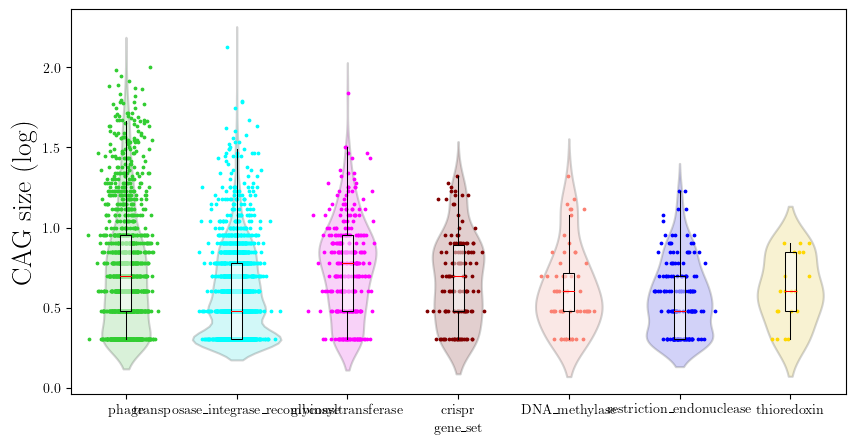

In [236]:
plt.figure(figsize=(10, 5))

sns.violinplot(x="gene_set", y="size", data=CAG_sizes, palette=CAG_colors, inner=None)
ax = plt.gca()
plt.setp(ax.collections, alpha=.2)

for i, gene_set in enumerate(gene_sets):
    data = CAG_sizes[CAG_sizes["gene_set"] == gene_set].iloc[:, 0]
    x_pos = np.ones(data.shape[0]) * i
    scale = 0.1
    x_pos = x_pos + np.random.normal(scale=scale, size=x_pos.shape)
    plt.scatter(x_pos, data, s=3, color=CAG_colors[gene_set])
    
    width = 0.75
    widths = 0.1
    c = "black"
    bp = ax.boxplot(data, positions=[i], patch_artist=True, widths=[widths], sym="", 
        boxprops=dict(facecolor=[1, 1, 1, 0.5], linewidth=width),
        capprops=dict(color=c, linewidth=0),
        whiskerprops=dict(color=c, linewidth=width),
        flierprops=dict(color=c, markeredgecolor=c, linewidth=width),
        medianprops=dict(color="red", linewidth=width))
    
plt.ylabel("CAG size (log)", fontsize=20)
plt.xticks(ticks=range(len(gene_sets)), labels=gene_sets)

plt.savefig("../output/figures/CAG_size.svg")

In [230]:
for gene_set in gene_sets:
    print(gene_set)
    for CAG in gene_set_to_CAG_set[gene_set]:
        print(CAG)
        break

phage
CAG07540
transposase_integrase_recombinase
CAG07349
glycosyltransferase
CAG17695
crispr
CAG09737
DNA_methylase
CAG24965
restriction_endonuclease
CAG06544
thioredoxin
CAG26968


In [223]:
node_set = {node.split("\n")[0] for node in G.nodes()}

In [224]:
for gene_set in gene_set_to_CAG_set:
    print(gene_set)
    print(gene_set_to_CAG_set[gene_set] & node_set)

phage
{'CAG06673', 'CAG07117', 'CAG15190', 'CAG05733', 'CAG06674', 'CAG18087', 'CAG05452', 'CAG05540', 'CAG04040', 'CAG10145', 'CAG02851', 'CAG24955', 'CAG22039', 'CAG11449', 'CAG08794', 'CAG04258', 'CAG09933', 'CAG03214', 'CAG02631', 'CAG07275', 'CAG04725', 'CAG26883', 'CAG07188', 'CAG09364', 'CAG22335'}
transposase_integrase_recombinase
{'CAG06673', 'CAG06454', 'CAG16802', 'CAG27569', 'CAG06125', 'CAG19037', 'CAG01402', 'CAG04174', 'CAG02757', 'CAG09220', 'CAG03501', 'CAG01241', 'CAG11690', 'CAG20508', 'CAG02710', 'CAG06345', 'CAG01347', 'CAG09499', 'CAG20187', 'CAG07971', 'CAG11559', 'CAG12436', 'CAG01420', 'CAG02624', 'CAG02919', 'CAG02892', 'CAG02925', 'CAG15095', 'CAG06355', 'CAG13050', 'CAG19951', 'CAG07708', 'CAG02761', 'CAG04915', 'CAG07049', 'CAG05647', 'CAG16343', 'CAG02631', 'CAG25579', 'CAG11312', 'CAG24895', 'CAG07275', 'CAG05504', 'CAG03400', 'CAG01220', 'CAG07188', 'CAG22335', 'CAG16370'}
glycosyltransferase
{'CAG04647', 'CAG08950', 'CAG09216', 'CAG03903'}
crispr
{'CAG0

In [226]:
import networkx as nx 

G = nx.DiGraph()

for node in nodes:
    taxa = CAG_to_taxa[node]
    taxa = taxa.loc[taxa.index != "unclassified"]
    taxa_name = "unknown" if len(taxa.index) == 0 else taxa.index[0].split(".")[-1]
    
    color = None
    for gene_set in gene_sets:
        if node in gene_set_to_CAG_set[gene_set]:
            color = CAG_colors[gene_set]
            break
    
    if color is None:
        color = "orange" if int(counts.loc[node]) > 700 else "steelblue"
    
    G.add_node(f"{node}\n({taxa_name})", color=color)
    
for a in ass_dict_retained:
    dep, host = a["dependent"], a["host"]
    dep_taxa = CAG_to_taxa[dep]
    host_taxa = CAG_to_taxa[host]
    dep_taxa = dep_taxa.loc[dep_taxa.index != "unclassified"]
    host_taxa = host_taxa.loc[host_taxa.index != "unclassified"]
    
    dep_taxa_name = "unknown" if len(dep_taxa.index) == 0 else dep_taxa.index[0].split(".")[-1]
    host_taxa_name = "unknown" if len(host_taxa.index) == 0 else host_taxa.index[0].split(".")[-1]
    
    if dep_taxa_name == host_taxa_name and dep_taxa_name != "unknown":
        G.add_edge(f"{dep}\n({dep_taxa_name})", f"{host}\n({host_taxa_name})", color="purple")
    else:
        G.add_edge(f"{dep}\n({dep_taxa_name})", f"{host}\n({host_taxa_name})", color="grey")
        
for ant in strong_ant:
    d1, d2 = ant["d1"], ant["d2"]
    
    d1_taxa = CAG_to_taxa[d1]
    d1_taxa = d1_taxa.loc[d1_taxa.index != "unclassified"]
    d1_taxa_name = "unknown" if len(d1_taxa.index) == 0 else d1_taxa.index[0].split(".")[-1]
    
    d2_taxa = CAG_to_taxa[d2]
    d2_taxa = d2_taxa.loc[d2_taxa.index != "unclassified"]
    d2_taxa_name = "unknown" if len(d2_taxa.index) == 0 else d2_taxa.index[0].split(".")[-1]
    
    G.add_edge(f"{d1}\n({d1_taxa_name})", f"{d2}\n({d2_taxa_name})", color="red")
    
nx.write_graphml(G, "../output/figures/graph.graphml")

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

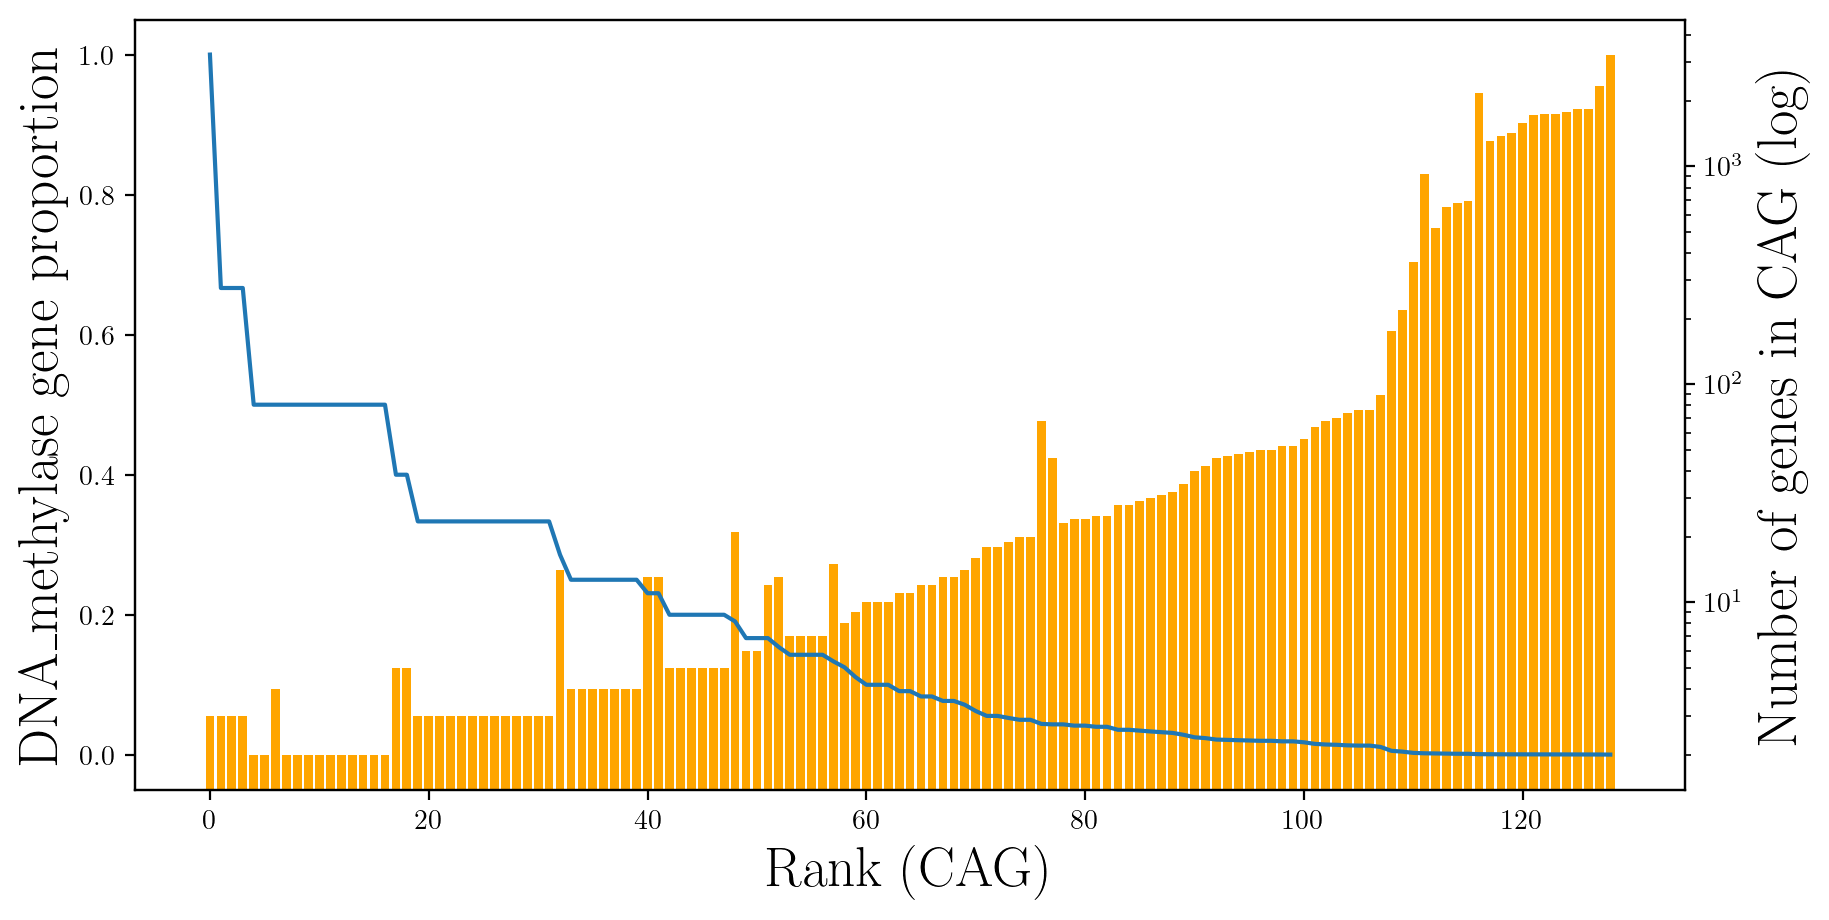

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

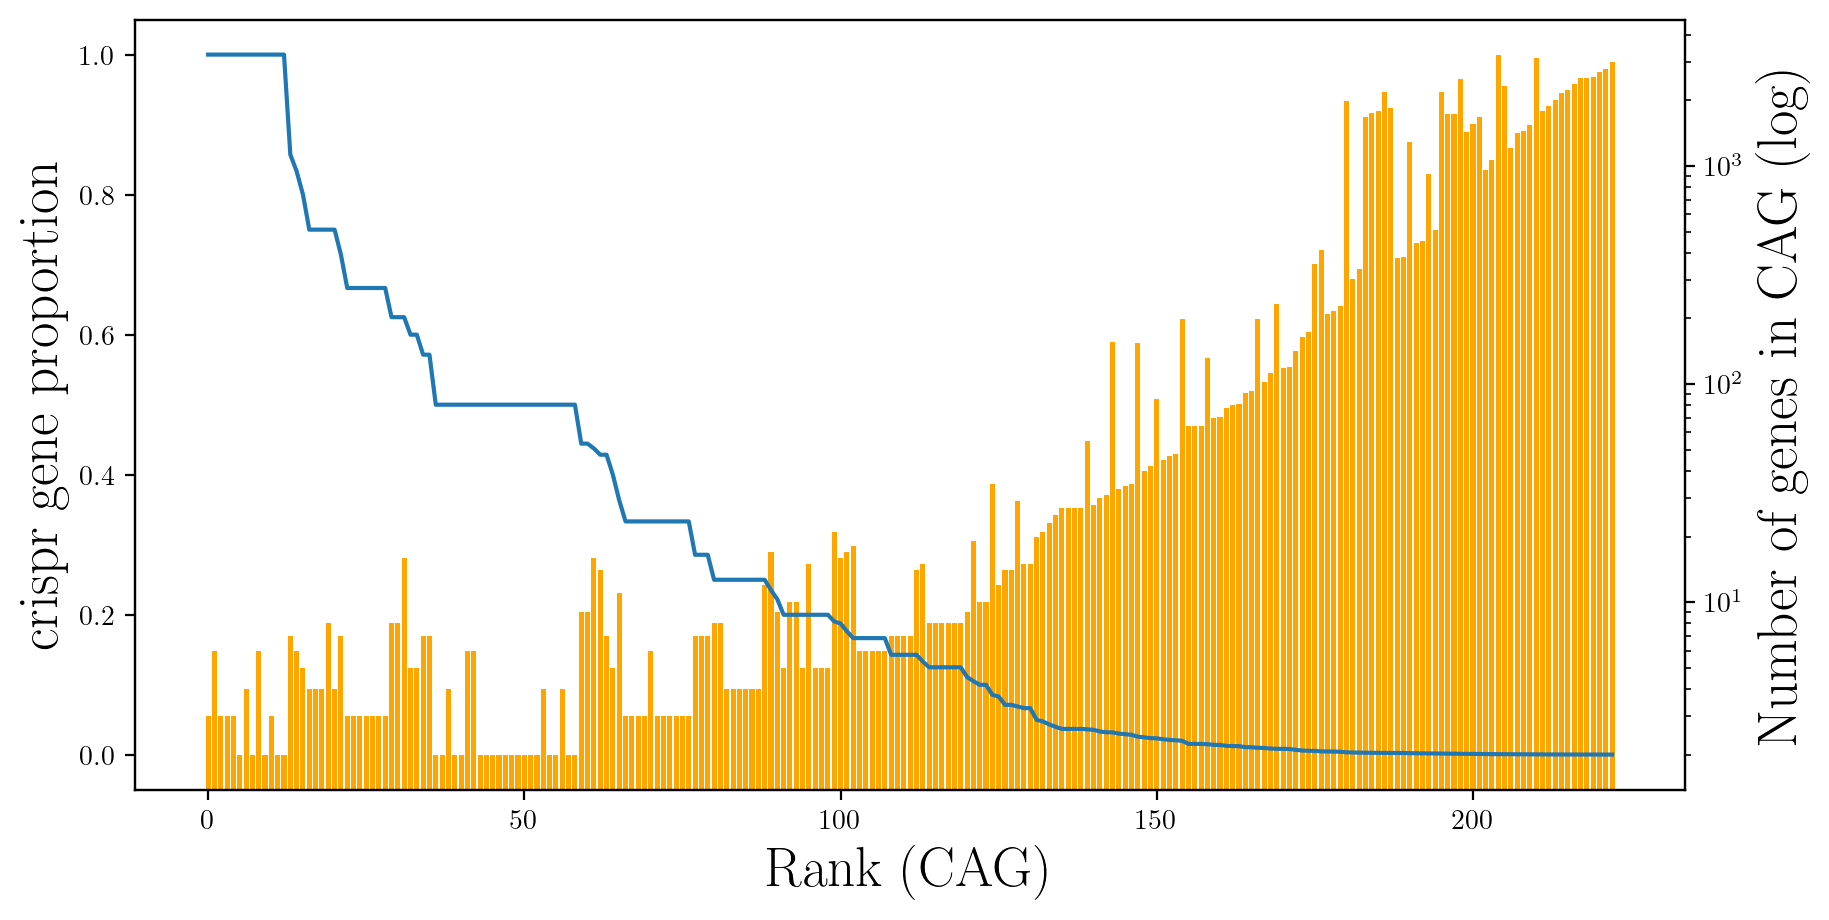

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

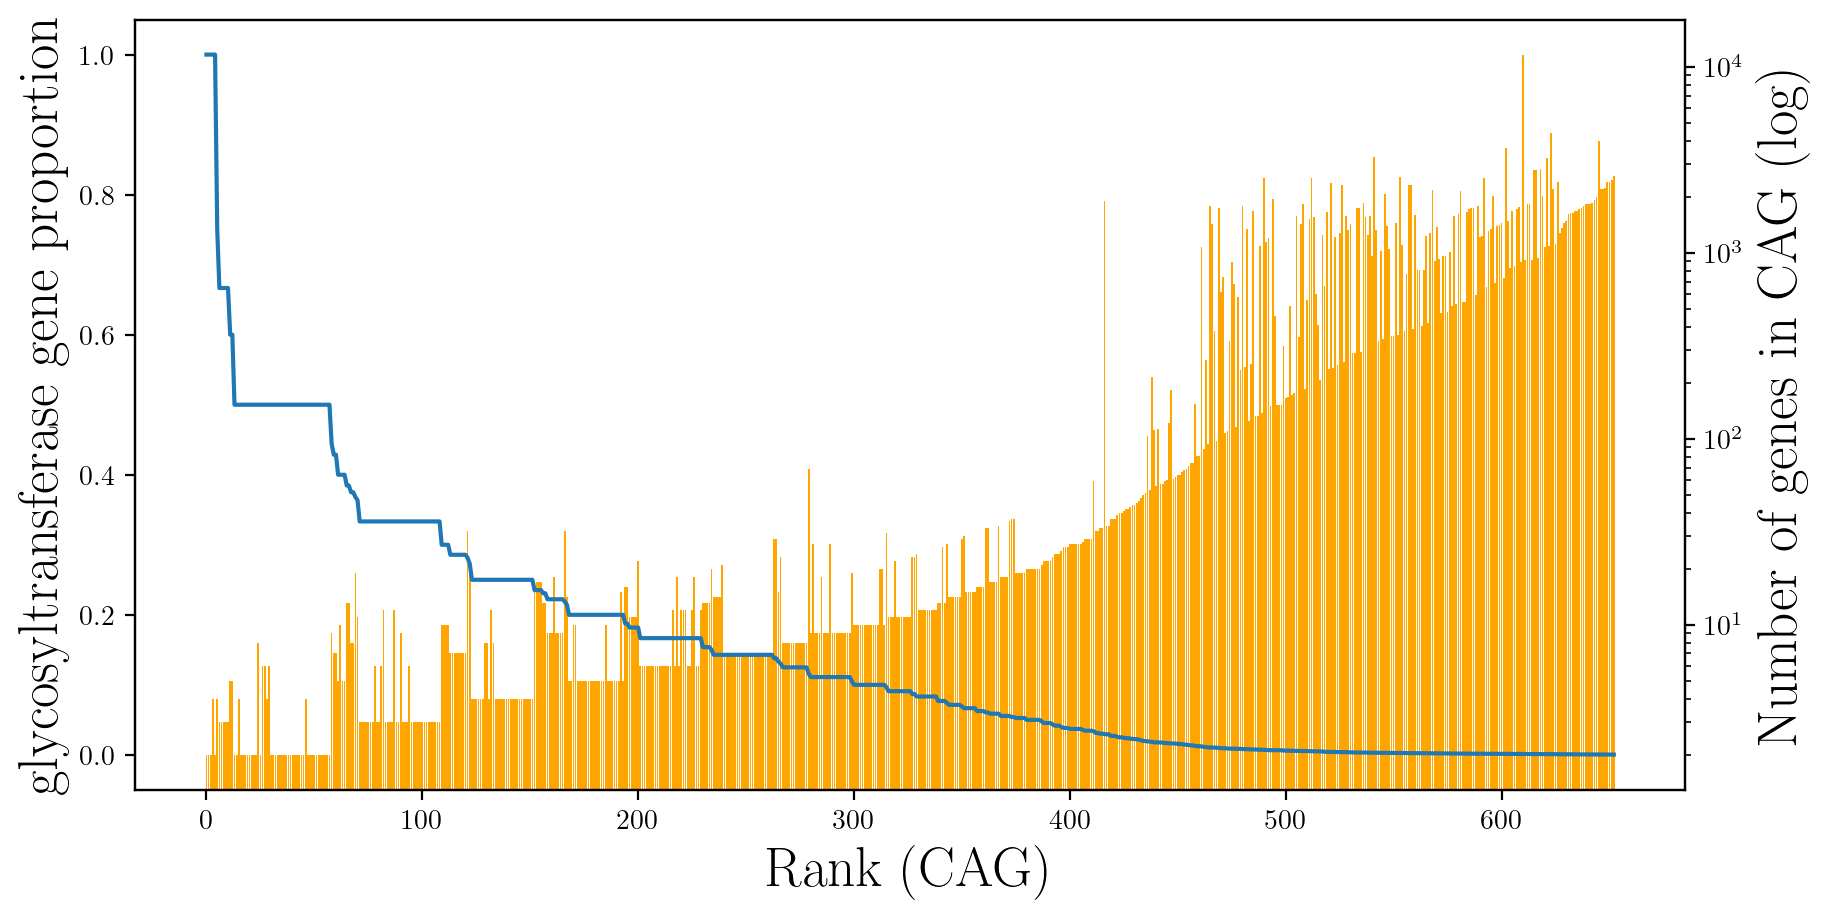

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

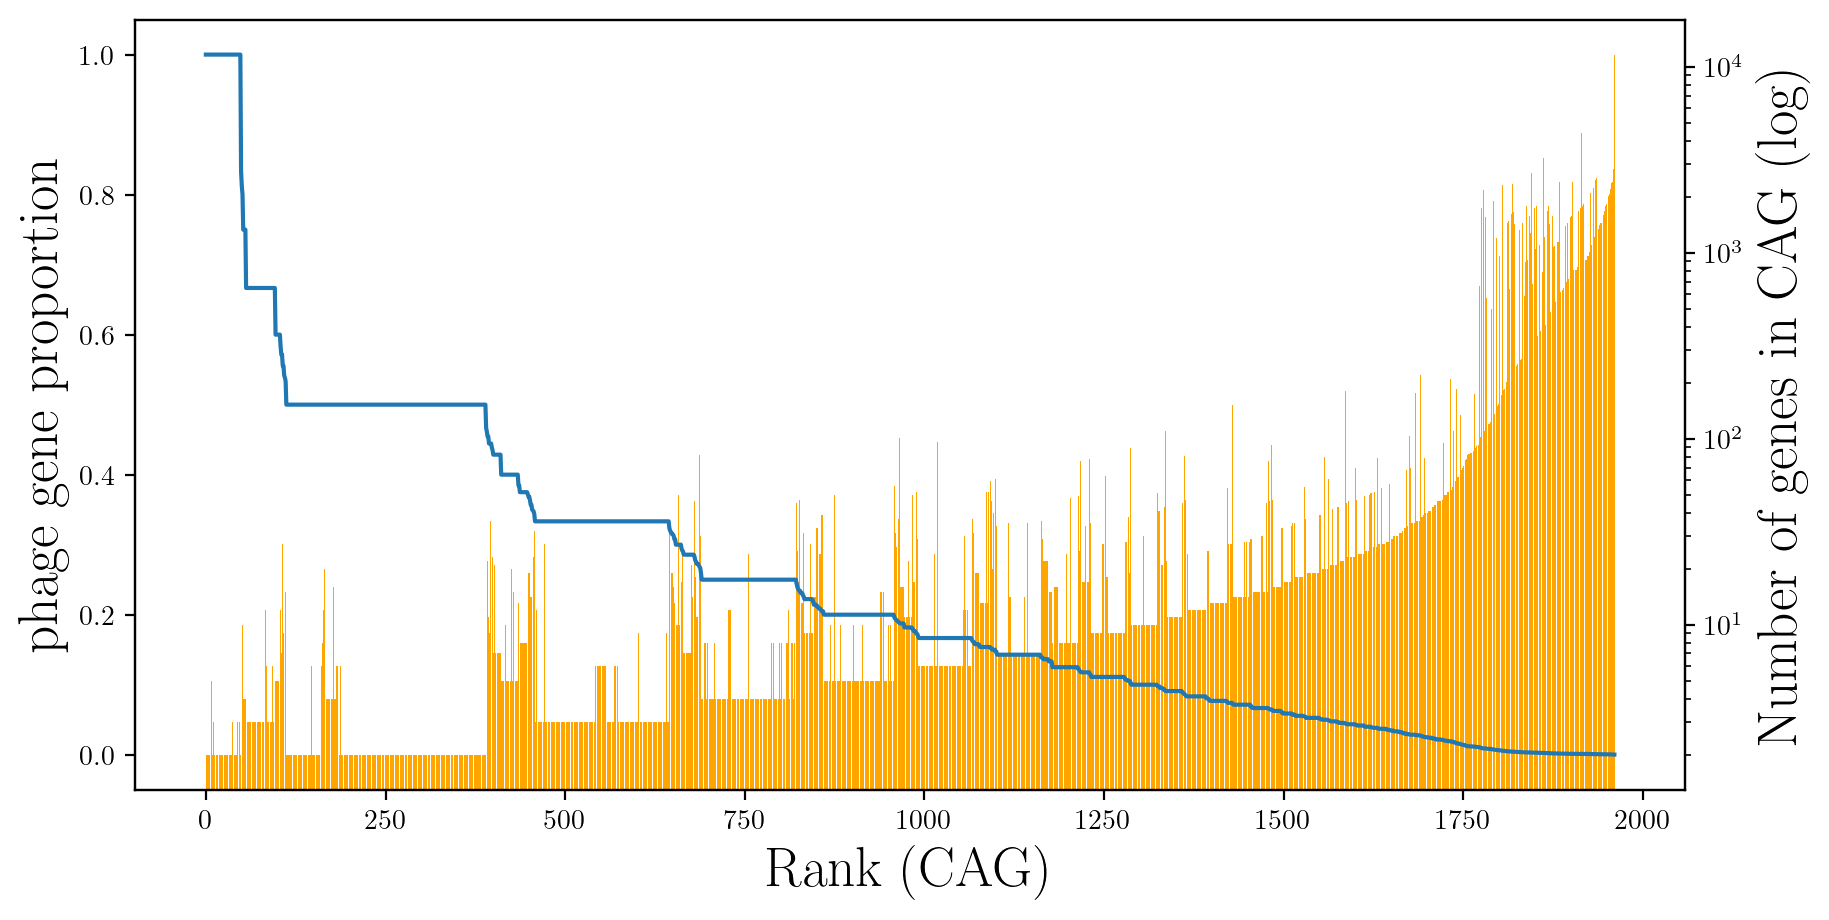

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

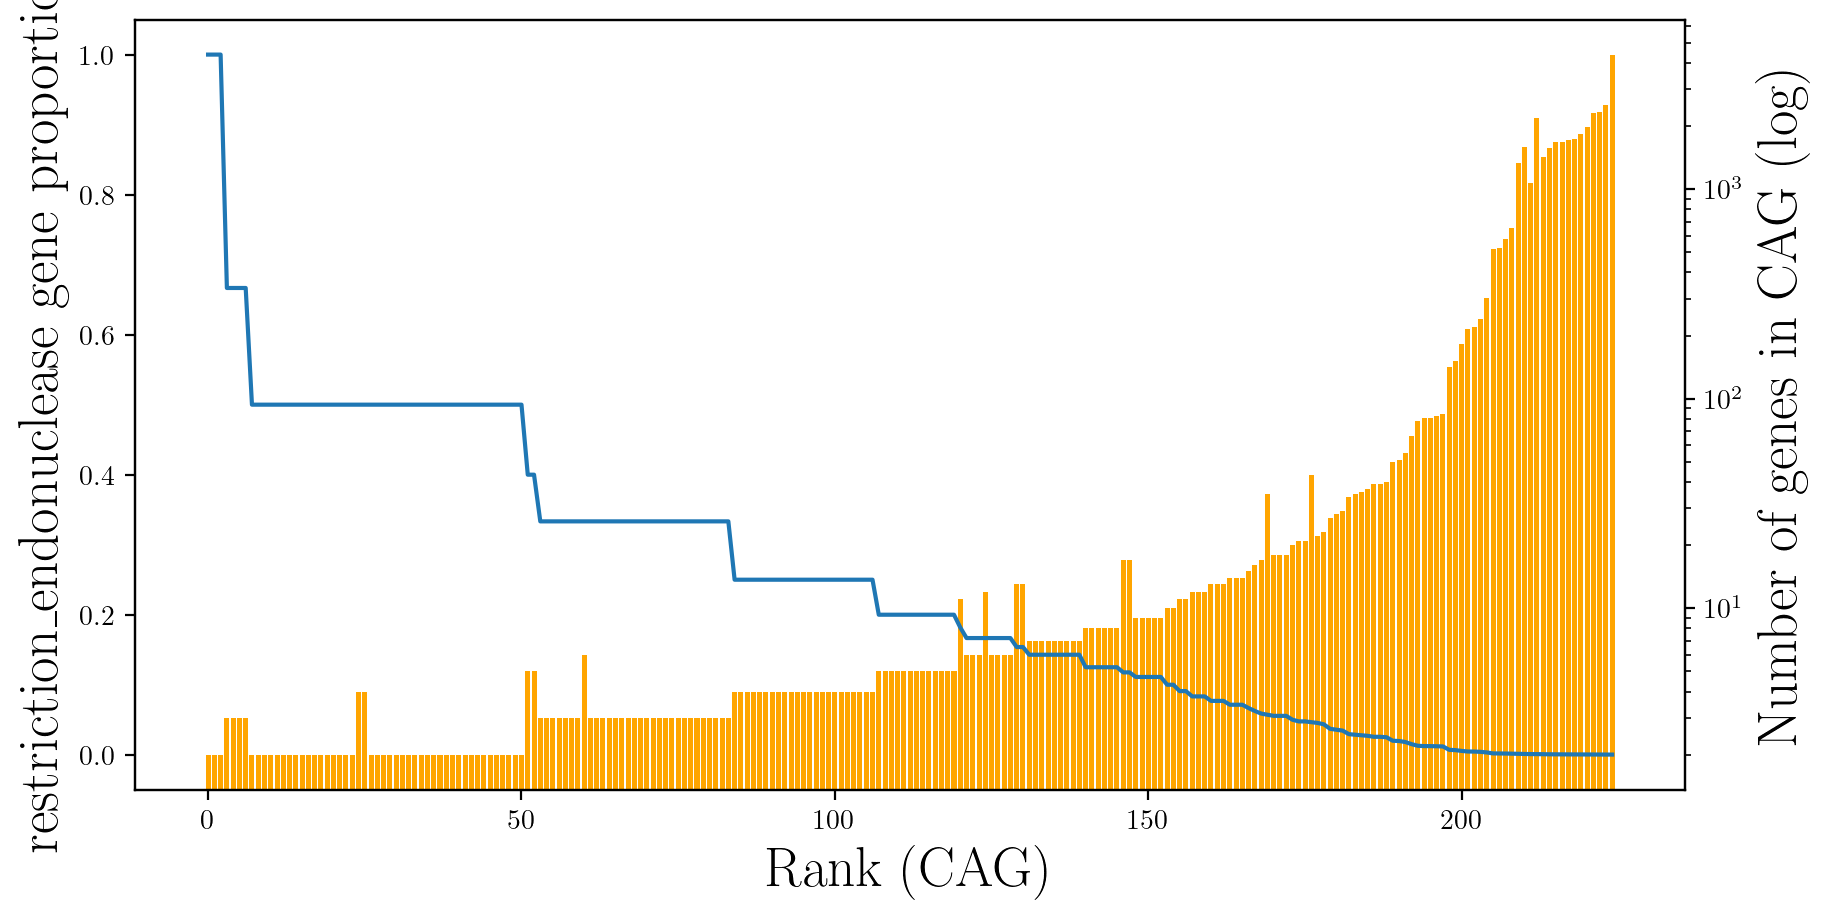

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

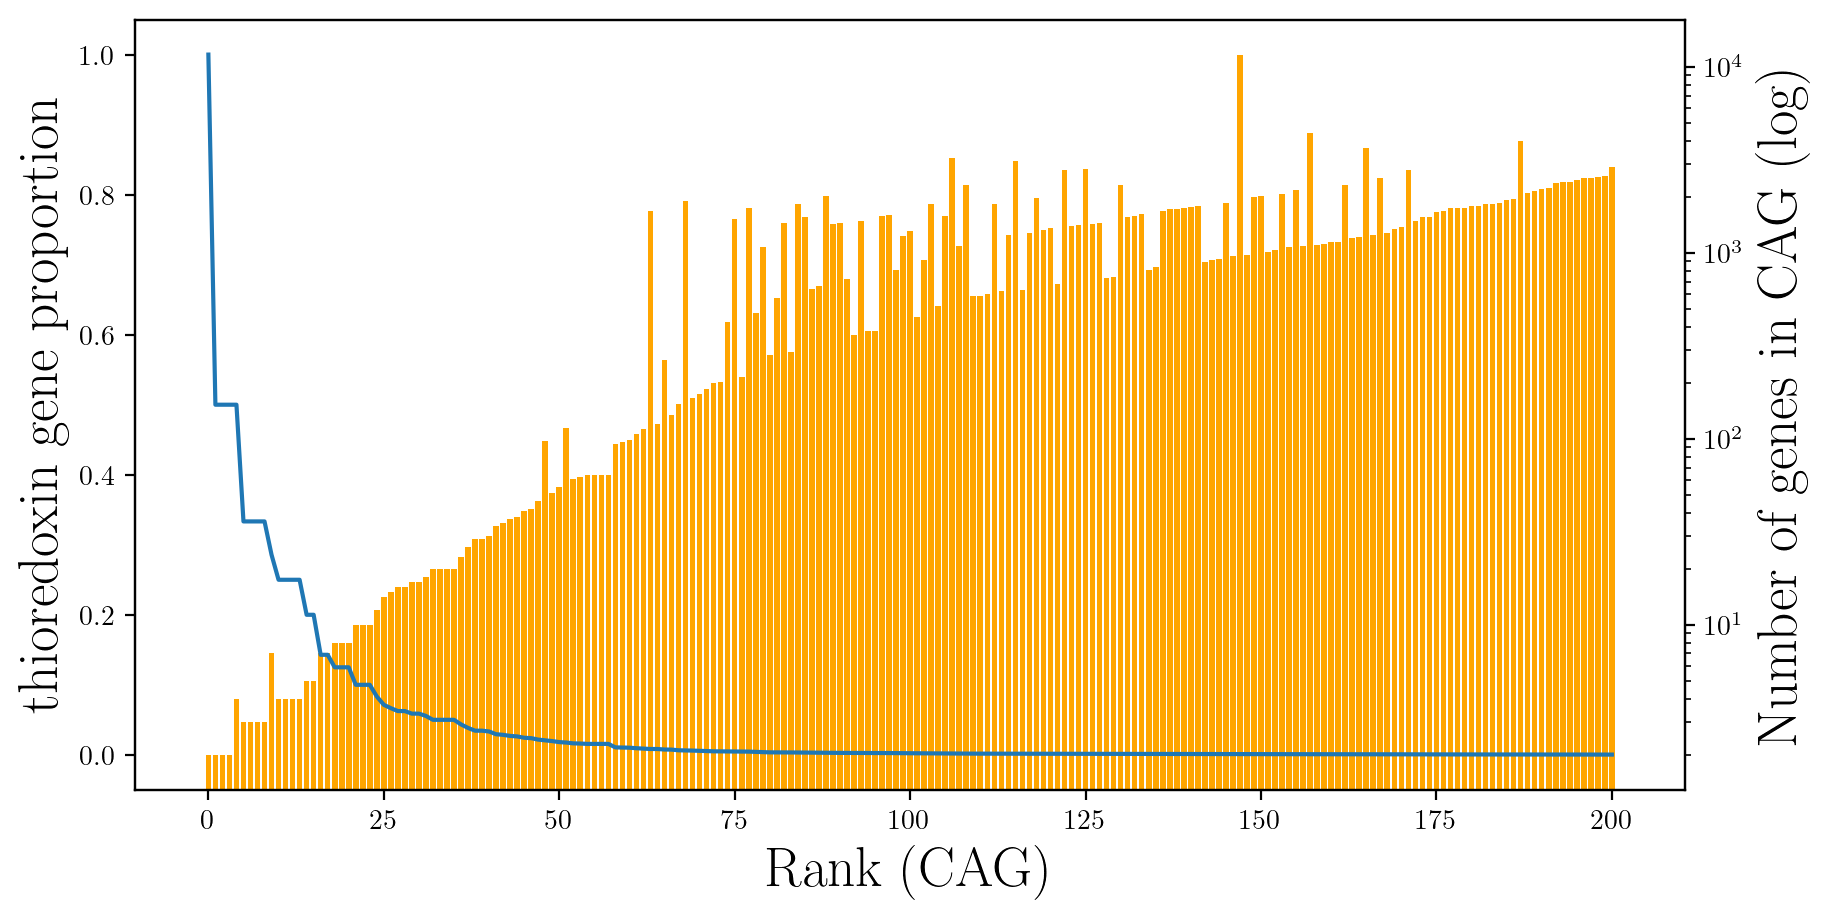

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3182751061.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  gene_pro

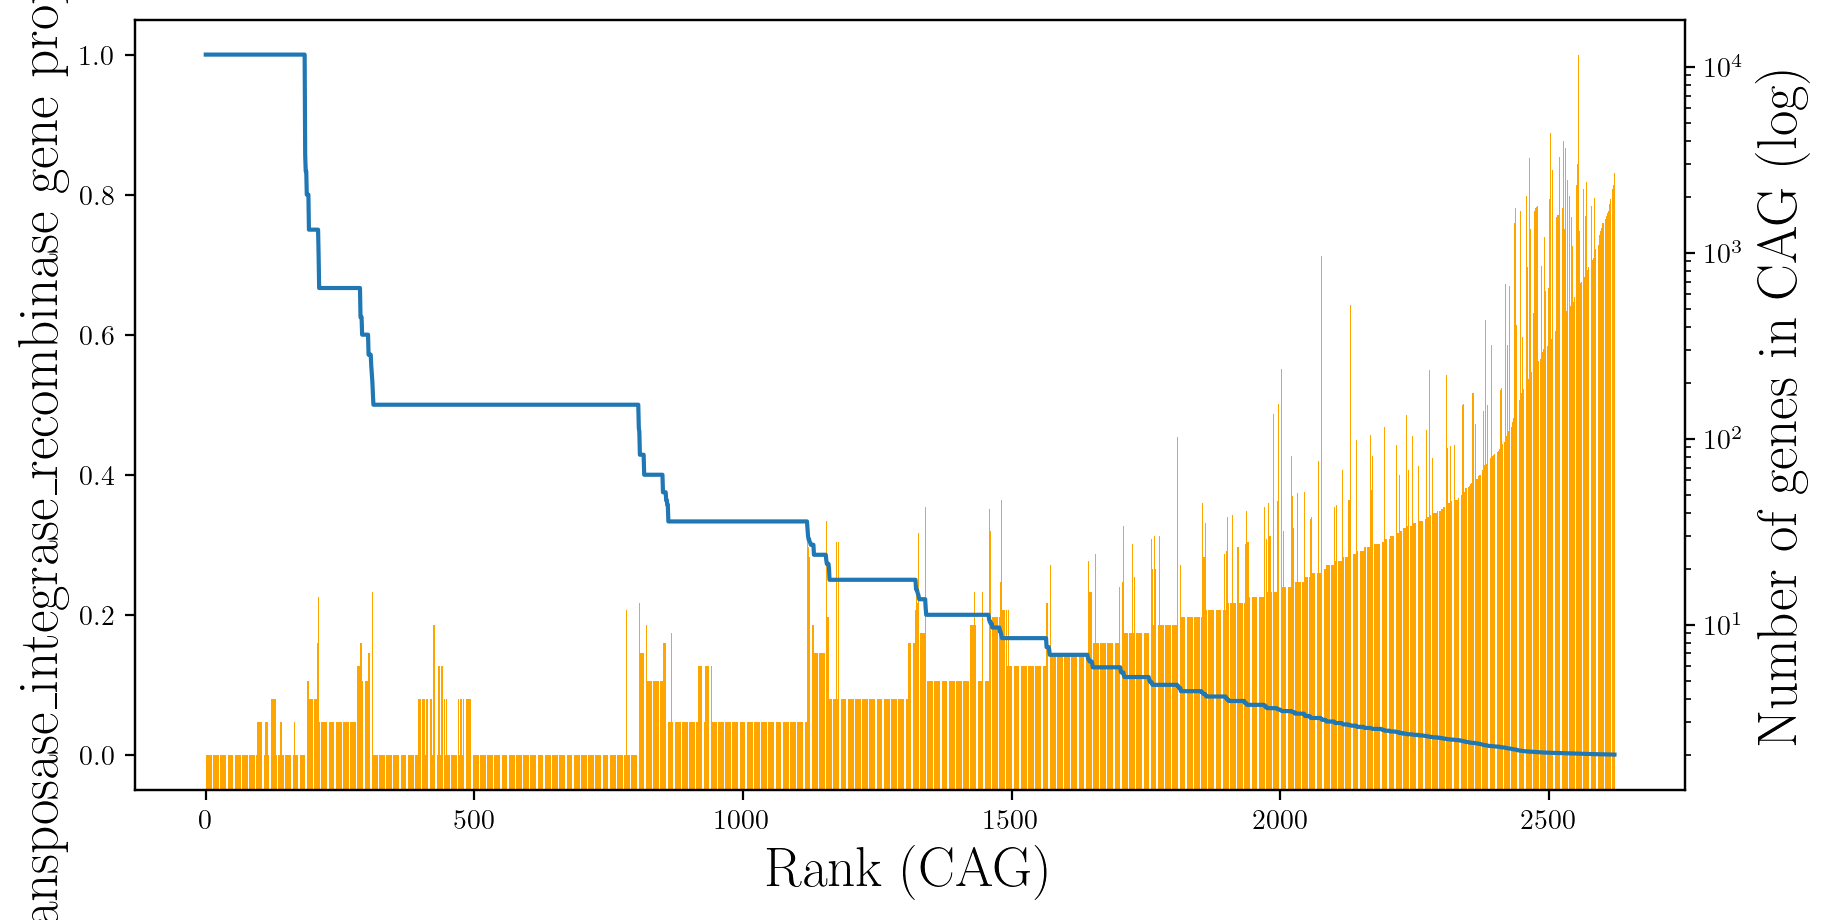

In [174]:
for gene_set in gene_sets:
    f = os.path.join(config.RAW_DIR, gene_set + ".txt")
    genes = pd.read_csv(f, header=None)
    genes_in_CAGs = set(genes.iloc[:, 0]) & set(clusters.iloc[:, 0])
    is_gene = clusters.iloc[:, 0].apply(lambda x : x in genes_in_CAGs)
    clusters[f"is_{gene_set}"] = is_gene
    gene_distribution = clusters.groupby(level=0).sum()[[f"is_{gene_set}"]]
    gene_proportions = np.divide(gene_distribution, counts)
    gene_proportions = gene_proportions[gene_proportions.iloc[:, 0] > 0].sort_values(f"is_{gene_set}", ascending=False)
    
    potential = gene_proportions.index
    
    plt.figure(figsize=(10, 5), dpi=200)
    ax = plt.gca()
    ax2 = plt.twinx()

    bar = ax.bar(range(potential.shape[0]), counts.loc[potential].values.flatten(), color="orange")
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_yscale("log")
    ax.set_ylabel("Number of genes in CAG (log)", fontsize=20)

    ax2.plot(gene_proportions.loc[potential].values.flatten())
    ax.set_xlabel("Rank (CAG)", fontsize=20)
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    ax2.set_ylabel(f"{gene_set} gene proportion", fontsize=20)
    
    plt.show()
    

In [104]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [105]:
phage_genes_in_CAGs = set(phage.iloc[:, 0]) & set(clusters.iloc[:, 0])

In [106]:
is_phage_gene = clusters.iloc[:, 0].apply(lambda x : x in phage_genes_in_CAGs)

In [107]:
clusters["is_phage_gene"] = is_phage_gene

In [108]:
phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/2207627127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]


In [109]:
phage_gene_distribution

,is_phage_gene
0,
CAG00001,2
CAG00002,5
CAG00003,5
CAG00004,3
CAG00005,11
...,...
CAG27814,0
CAG27815,0
CAG27816,0


In [110]:
phage_gene_proportions = np.divide(phage_gene_distribution, counts)

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_1585/3229526074.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  phage_gene_proportions = np.divide(phage_gene_distribution, counts)


In [111]:
phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0].sort_values("is_phage_gene", ascending=False)

,is_phage_gene
0,
CAG23659,1.000000
CAG24842,1.000000
CAG23718,1.000000
CAG23879,1.000000
CAG24075,1.000000
...,...
CAG00023,0.000420
CAG00020,0.000415
CAG00014,0.000384


In [122]:
potential_phages = phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0.25].sort_values("is_phage_gene", ascending=False).index
potential_phages

Index(['CAG19342', 'CAG12742', 'CAG24842', 'CAG24873', 'CAG22541', 'CAG13058',
       'CAG26604', 'CAG24904', 'CAG17683', 'CAG24075',
       ...
       'CAG00831', 'CAG02169', 'CAG01377', 'CAG03857', 'CAG03689', 'CAG03661',
       'CAG01038', 'CAG00530', 'CAG01315', 'CAG01460'],
      dtype='object', name=0, length=690)

In [175]:
clusters.loc["CAG00010"]

,1,is_phage_gene,is_DNA_methylase,is_crispr,is_glycosyltransferase,is_phage,is_restriction_endonuclease,is_thioredoxin,is_transposase_integrase_recombinase
0,,,,,,,,,
CAG00010,UniRef90_A0A149MX73,False,False,False,False,False,False,False,False
CAG00010,UniRef90_A0A015YVN2,False,False,False,False,False,False,False,False
CAG00010,UniRef90_A0A149NIE6,False,False,False,False,False,False,False,False
CAG00010,UniRef90_UPI00044EC20B,False,False,False,False,False,False,False,False
CAG00010,UniRef90_E4VWT0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
CAG00010,UniRef90_K1GN12,False,False,False,False,False,False,False,False
CAG00010,UniRef90_F7LPZ0,False,False,False,False,False,False,False,False
CAG00010,UniRef90_Q5LET7,False,False,False,False,False,False,False,False


In [243]:
color_patches = []
for gene_set in gene_sets:
    color = CAG_colors[gene_set]
    color_patches.append(Patch(facecolor=color, edgecolor="black", label=gene_set))

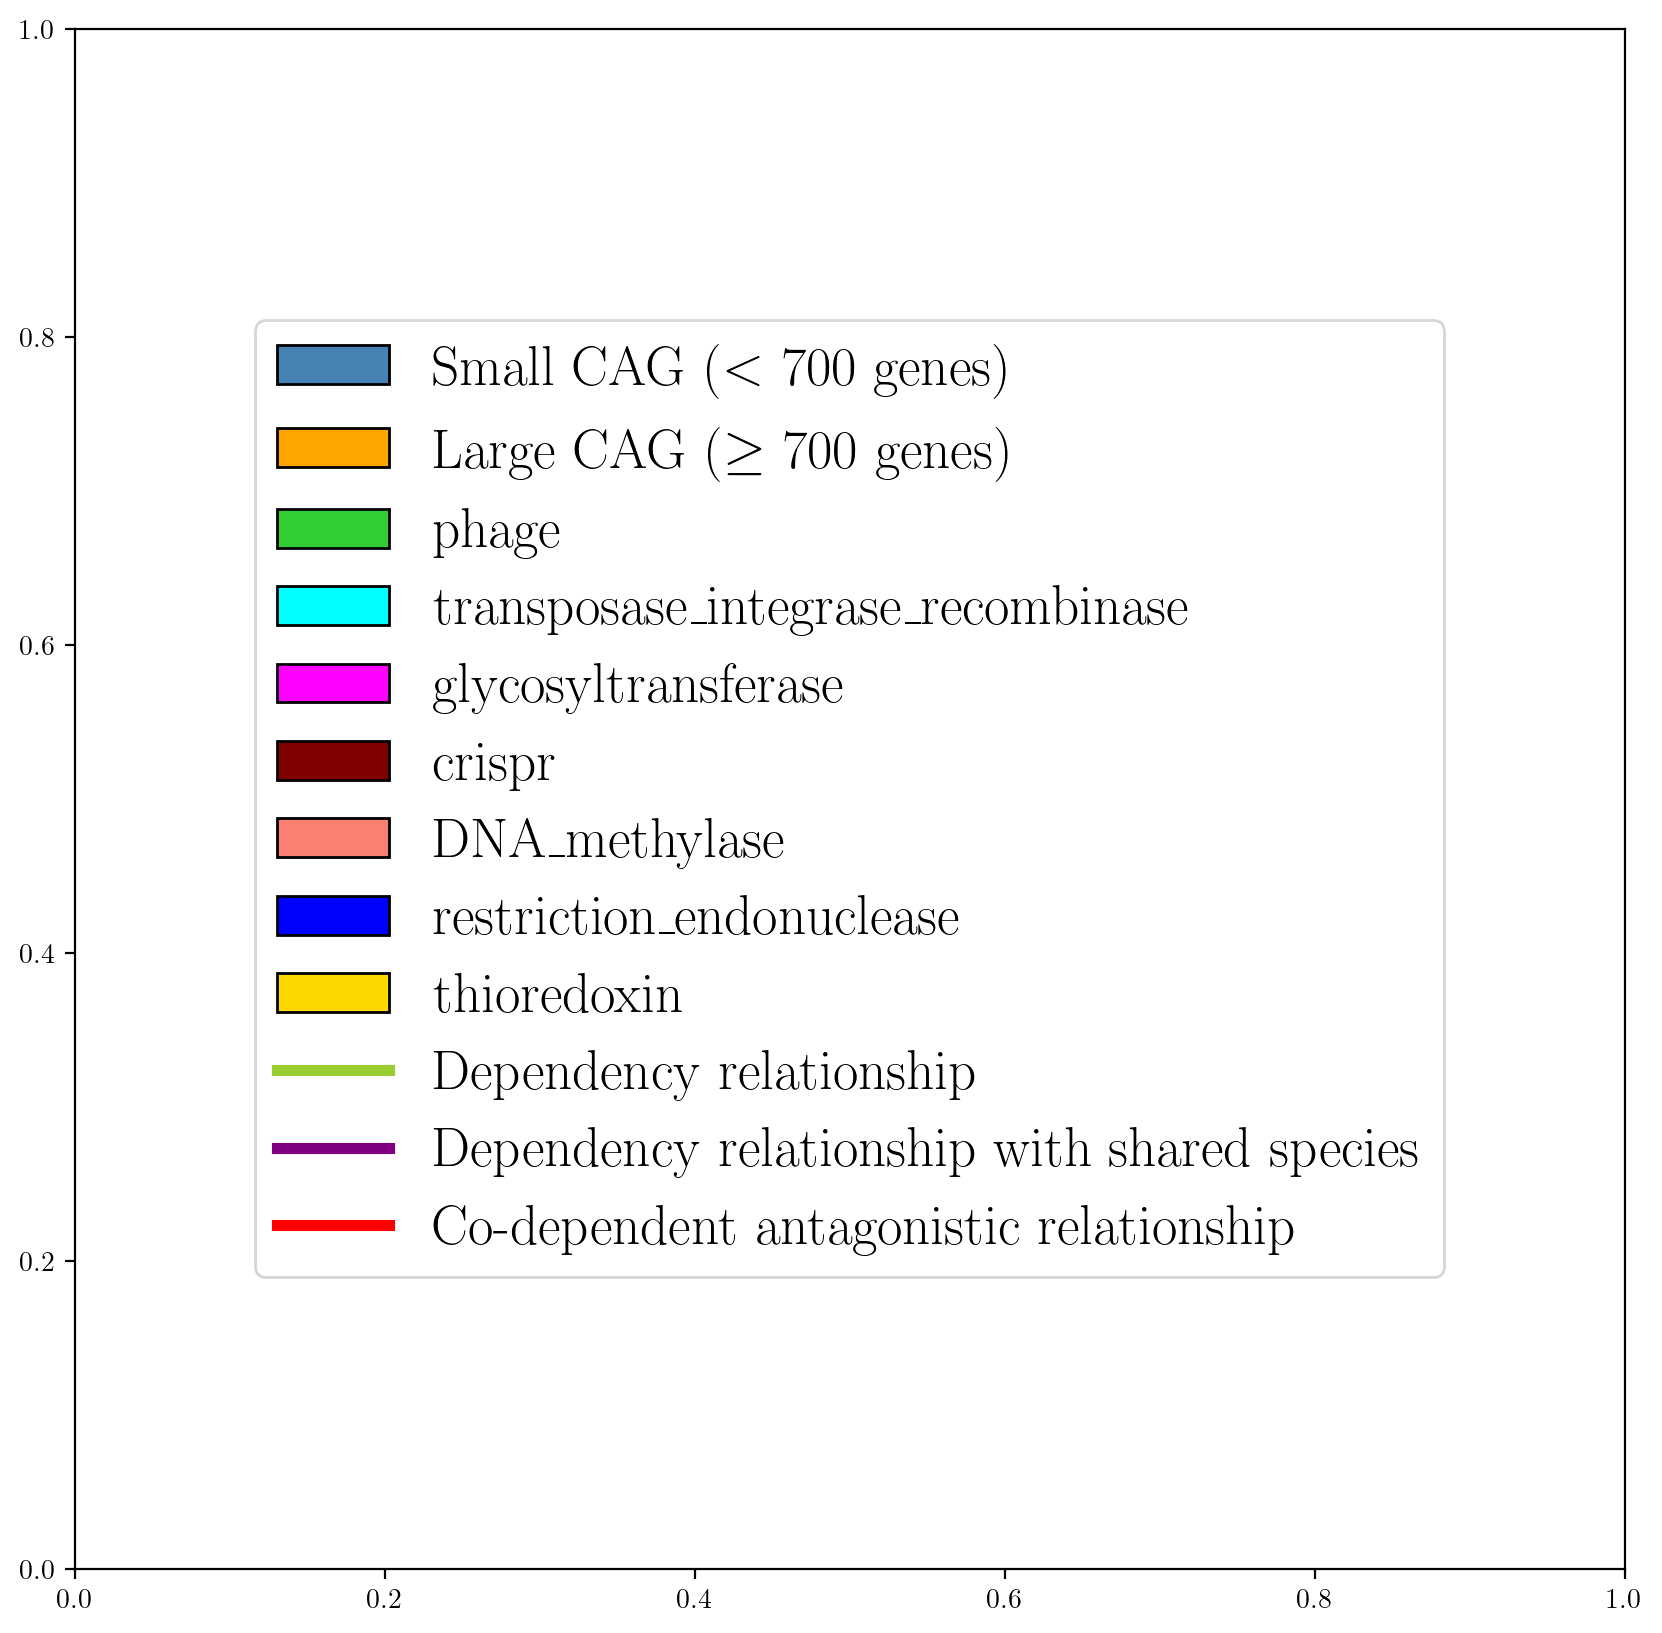

In [244]:
plt.figure(dpi=200, figsize=(10, 10))
plt.rcParams['svg.fonttype'] = 'none'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='steelblue', edgecolor='black', label="Small CAG ($<$ 700 genes)"),
                   Patch(facecolor='orange', edgecolor='black', label='Large CAG ($\ge$ 700 genes)'),] + color_patches + [
                   Line2D([0], [0], color='yellowgreen', lw=4, label='Dependency relationship'),
                   Line2D([0], [0], color='purple', lw=4, label='Dependency relationship with shared species'),
                   Line2D([0], [0], color='r', lw=4, label='Co-dependent antagonistic relationship'),
]

plt.legend(handles=legend_elements, loc='center', prop={'size': 20})

# small CAG (<700 genes)
# Orange = large CAG (>= 700 genes)
# Green = CAG has >= 25% phage genes
# Red edges = antagonistic relationship
# Purple edges = host and dependent CAG share the same most common species

plt.savefig("../output/figures/graph_legend.svg")

plt.show()

In [249]:
[s for s in strong_ant if s["d1"] == "CAG05647" and s["d2"] == "CAG14446"]

[{'d1': 'CAG05647',
  'd2': 'CAG14446',
  'coef': -0.5454484212961315,
  'host': 'CAG00161'}]